In [1]:
import pandas as pd

## 1. Carga de dados

In [2]:
df_habitos = pd.read_pickle('microdados_enem_2022/DADOSpkl/habitos.pkl')
df_notas = pd.read_pickle('microdados_enem_2022/DADOSpkl/notas.pkl')

## 2. Unindo predictors com target

In [3]:
df_habitos.head()

,NU_INSCRICAO,TP_RESPOSTA,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,...,Q033B,Q033C,Q033D,Q033E,Q033F,Q033G,Q033H,Q033I,Q033J,Q034
20,210054478262,1,A,A,B,C,A,A,A,A,...,A,A,B,B,B,B,B,B,B,B
44,210054478303,1,B,A,A,C,B,B,A,D,...,B,A,B,B,B,B,B,B,B,B
70,210054478359,1,B,B,B,C,A,A,B,A,...,B,A,B,B,B,B,B,B,A,A
85,210054478399,1,B,A,B,C,B,B,B,A,...,B,B,B,B,B,B,B,B,B,B
111,210054478443,1,A,A,B,C,C,C,C,D,...,A,B,B,B,B,B,B,B,B,C


In [4]:
# Combinar os DataFrames usando a coluna "NU_INSCRICAO", incluindo apenas a coluna com as notas de matemática
df = pd.merge(df_habitos, df_notas[['NU_INSCRICAO', 'NU_NOTA_MT']], on='NU_INSCRICAO')

<Axes: >

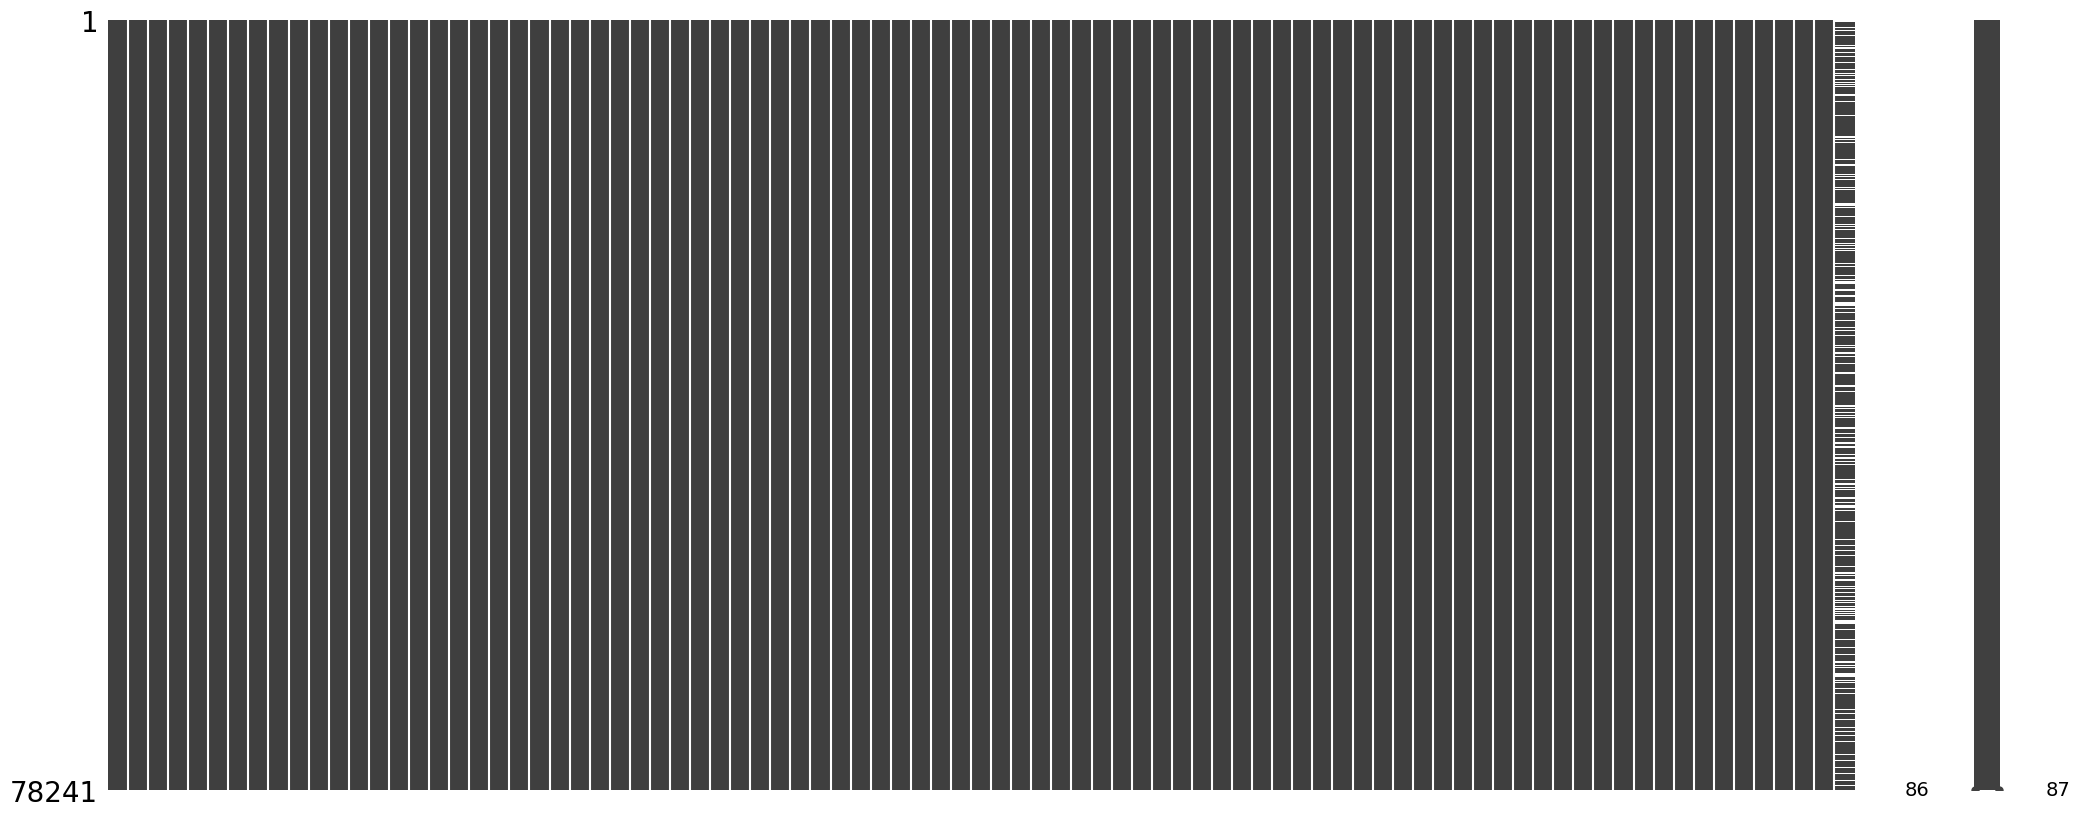

In [5]:
#verificando os participantes que não fizeram a prova de matemática
import missingno as msno
msno.matrix(df)

<Axes: >

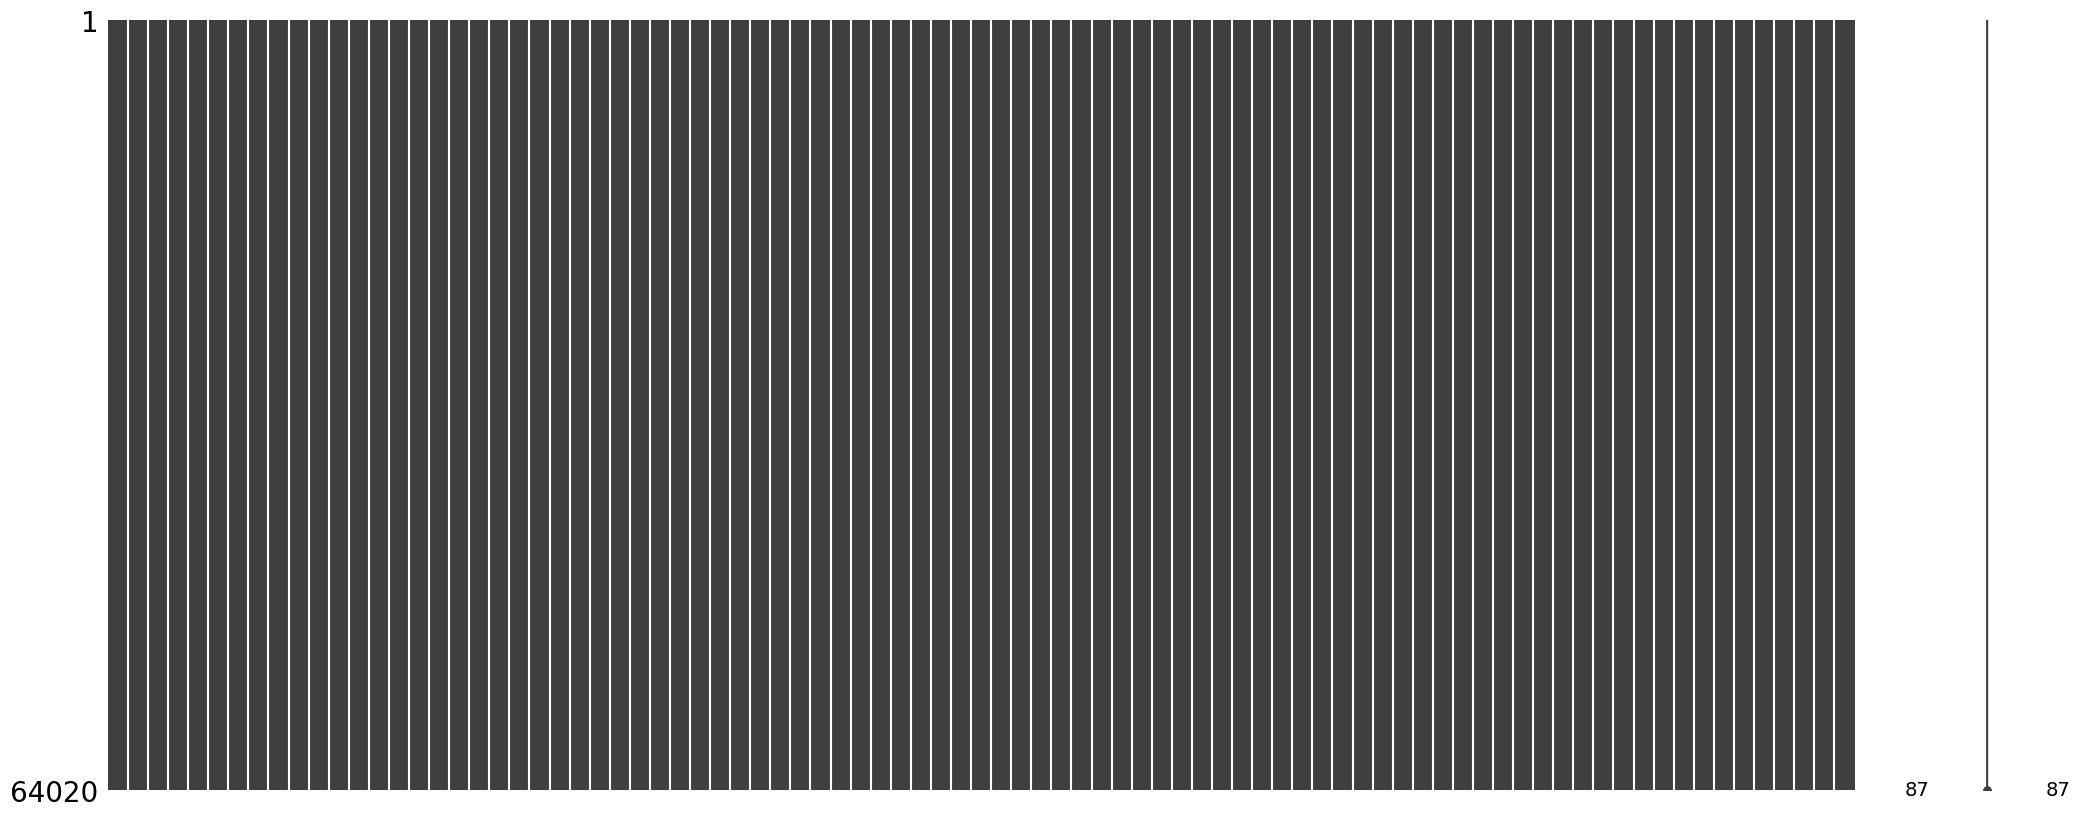

In [6]:
#Apenas os participantes que responderam a pesquisa e fizeram fizeram a prova de matemática
df=df.dropna()
msno.matrix(df)

## Processamento

In [7]:
del df['NU_INSCRICAO']
del df['TP_RESPOSTA']

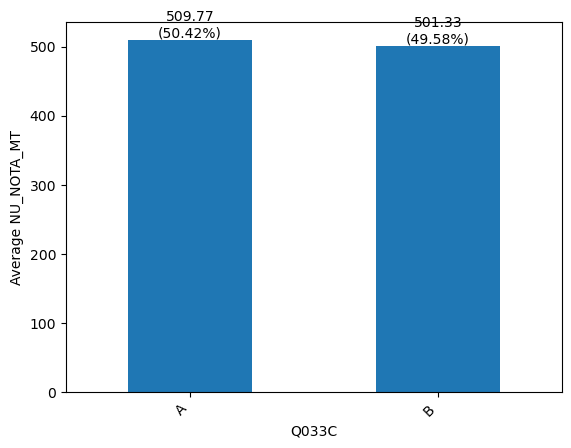

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame containing the required columns

df_media = df.groupby('Q033C')['NU_NOTA_MT'].mean()

ax = df_media.plot(kind='bar')
ax.set_xlabel('Q033C')
ax.set_ylabel('Average NU_NOTA_MT')

# Define os rótulos personalizados
ax.set_xticklabels(df_media.index, rotation=45, ha='right')

# Adiciona rótulos com valores absolutos e percentuais
for i, v in enumerate(df_media):
    absolute_label = f"{v:.2f}"
    percent_label = f"{(v / df_media.sum() * 100):.2f}%"
    ax.annotate(f"{absolute_label}\n({percent_label})", xy=(i, v), ha='center', va='bottom')

plt.show()


In [14]:
df

,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,...,Q033C,Q033D,Q033E,Q033F,Q033G,Q033H,Q033I,Q033J,Q034,NU_NOTA_MT
0,A,A,B,C,A,A,A,A,B,B,...,A,B,B,B,B,B,B,B,B,557.0
1,B,A,A,C,B,B,A,D,A,B,...,A,B,B,B,B,B,B,B,B,402.2
2,B,B,B,C,A,A,B,A,A,A,...,A,B,B,B,B,B,B,A,A,378.0
3,B,A,B,C,B,B,B,A,B,C,...,B,B,B,B,B,B,B,B,B,416.0
4,A,A,B,C,C,C,C,D,C,C,...,B,B,B,B,B,B,B,B,C,461.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78234,A,A,C,C,B,B,B,B,B,C,...,B,B,A,B,A,B,B,B,B,569.5
78236,C,C,A,C,B,C,C,B,B,B,...,B,B,B,B,B,B,B,B,C,456.4
78237,B,A,B,E,C,C,C,B,B,C,...,B,B,B,A,B,B,B,B,C,380.6
78238,A,A,A,C,B,A,B,B,D,B,...,B,B,B,B,B,B,B,A,B,393.8
